# 기계학습

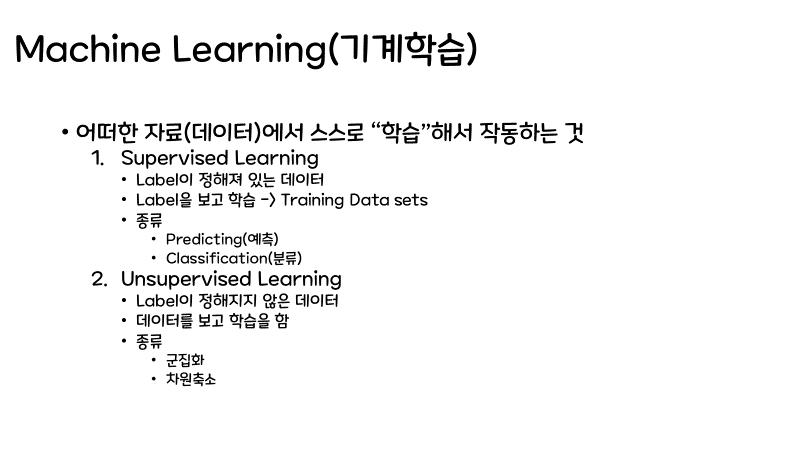

+ 기계학습은 크게 2가지로 나뉜다.(사실 강화학습까지 3가지)
    + Label이 있는 지도학습
    + Label이 없는 비지도학습

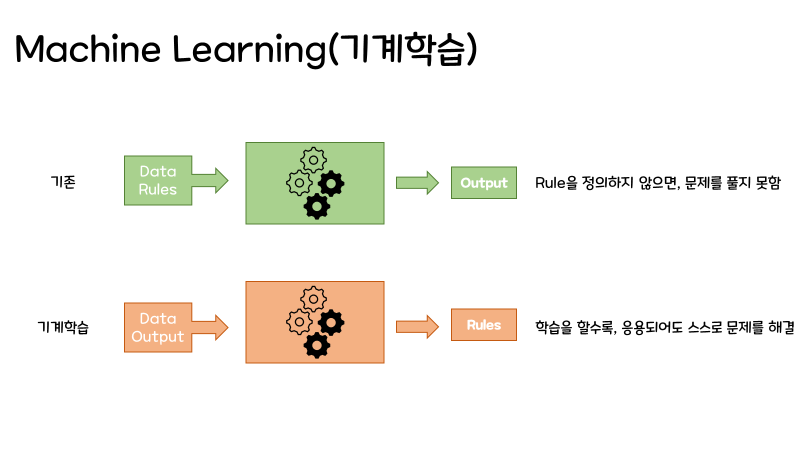

+ 기계학습은 많은 데이터를 통해서 Rule을 학습한다.
+ 기존의 Rulu-based에서 벗어난다.
+ 기계가 스스로 수많은 데이터 속에서 Rule을 발견하고 스스로 학습하여 문제를 해결한다.

# 선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

### 머신러닝 연산 과정
**데이터들을 가장 잘 대변하는 직선 방정식을 찾는 것**
1. 가설 설정
 + H(X) = W * X + b
 + 가설 직선은 W(기울기)와 b(절편)으로 선의 모양이 결정된다.
2. Loss 값 계산
  + Loss = (Label - H(x)) ** 2
  + 실제값(Label)과 예측값(H(x))간의 차이를 계산
  + MSE(평균오차제곱) : **Loss(W,b) = Mean((Label - H(x))^2)**
  + 실제값과 예측값의 대한 차이 Loss는 W,b에 대한 함수로 표현 할 수 있음
    + 즉 축이 W축, b축, Loss축인 3차원 그래프가 형성 됨.
3. 비용 최소화
  + Loss(W,b)가 최소가 되는 W와 b를 찾는 작업
  + **경사하강법**을 통해 W,b 값을 갱신 해나간다.


경사하강법의 원리
> 함수 값을 증가시키고 싶다면 미분값을 더하고, **감소시키고 싶으면 미분 값을 뺀다.**<br>
미분값이 양수이면, 증가하는 기울기에 있으므로 미분값을 더했을 때 x + f'(x) > x, 오른쪽으로 이동하여 함수값이 증가하게 된다.<br>
미분값이 음수이면, 감소하는 기울기에 있으므로 미분값을 더했을 때 x + f'(x) < x, 왼쪽으로 이동하여 함수값이 증가하게 된다.<br>
**미분값이 양수**이면, 증가하는 기울기에 있으므로 **기존 값에서 미분값을 뺐을 때 x - f'(x) < x, 왼쪽으로 이동하여 함수값이 감소**하게 된다.<br>
**미분값이 음수**이면, 감소하는 기울기에 있으므로 **기존 값에서 미분값을 뺐을 때 x - f'(x) > x, 오른쪽으로 이동하여 함수값이 감소**하게 된다.

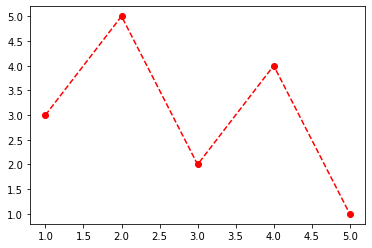

In [13]:
# 예제
x_data = torch.tensor([[1],[2],[3],[4],[5]]).float()
y_data = torch.tensor([[3],[5],[2],[4],[1]]).float()

plt.plot(x_data, y_data, 'ro--')
plt.show()

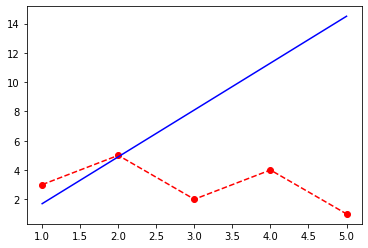

In [40]:
# 가설 설정
def H(x):
    return x*W.detach().numpy() + b.detach().numpy()

W = torch.tensor([3.2], requires_grad=True) 
b = torch.tensor([-1.5], requires_grad=True) 

plt.plot(x_data, y_data, 'ro--')
plt.plot(x_data, H(x_data), 'b-')
plt.show()

학습을 통해 오차가 최소가 되는 가설 직선 H(x)를 구해보자

In [41]:
hypothesis = lambda x : x * W + b
loss_fn = lambda x : torch.mean((hypothesis(x) - y_data) ** 2)
opt = optim.SGD([W, b], lr=0.01)

In [43]:
print("학습 전 >>> W : {:.3f}\tb : {:.3f}\n".format(W.item(), b.item()))

for epoch in range(1, 1001):
    output = hypothesis(x_data)
    loss = loss_fn(x_data)
    
    opt.zero_grad() 
    loss.backward()
    opt.step()
    
    if epoch % 25 ==0:
        print("epoch {} >>> loss : {:.4f}".format(epoch,loss.item()))

print("\n학습 후 >>> W : {:.3f}\tb : {:.3f}".format(W.item(), b.item()))

학습 전 >>> W : 0.154	b : 2.138

epoch 25 >>> loss : 2.3632
epoch 50 >>> loss : 2.2287
epoch 75 >>> loss : 2.1152
epoch 100 >>> loss : 2.0194
epoch 125 >>> loss : 1.9385
epoch 150 >>> loss : 1.8702
epoch 175 >>> loss : 1.8125
epoch 200 >>> loss : 1.7638
epoch 225 >>> loss : 1.7227
epoch 250 >>> loss : 1.6880
epoch 275 >>> loss : 1.6587
epoch 300 >>> loss : 1.6340
epoch 325 >>> loss : 1.6131
epoch 350 >>> loss : 1.5955
epoch 375 >>> loss : 1.5806
epoch 400 >>> loss : 1.5681
epoch 425 >>> loss : 1.5575
epoch 450 >>> loss : 1.5485
epoch 475 >>> loss : 1.5410
epoch 500 >>> loss : 1.5346
epoch 525 >>> loss : 1.5292
epoch 550 >>> loss : 1.5246
epoch 575 >>> loss : 1.5208
epoch 600 >>> loss : 1.5176
epoch 625 >>> loss : 1.5148
epoch 650 >>> loss : 1.5125
epoch 675 >>> loss : 1.5106
epoch 700 >>> loss : 1.5089
epoch 725 >>> loss : 1.5075
epoch 750 >>> loss : 1.5064
epoch 775 >>> loss : 1.5054
epoch 800 >>> loss : 1.5045
epoch 825 >>> loss : 1.5038
epoch 850 >>> loss : 1.5032
epoch 875 >>> loss : 


학습 후 >>> W : -0.478	b : 4.420


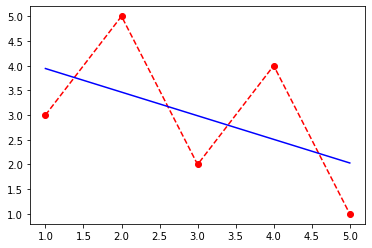

In [45]:
print("\n학습 후 >>> W : {:.3f}\tb : {:.3f}".format(W.item(), b.item()))

plt.plot(x_data, y_data, 'ro--')
plt.plot(x_data, H(x_data), 'b-')
plt.show()

## nn.Module
+ 1Layer 딥러닝 관점

In [73]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        self.fc = nn.Linear(1,1)
    def forward(self, x):
        x = self.fc(x)
        return x
    
model = MyModel()
loss_fn = nn.MSELoss()
opt = optim.SGD(model.parameters(), lr=0.01)

print(model)
print(list(model.parameters()))

MyModel(
  (fc): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.4373]], requires_grad=True), Parameter containing:
tensor([-0.8967], requires_grad=True)]


학습 전 >>> W : 0.437	b : -0.897



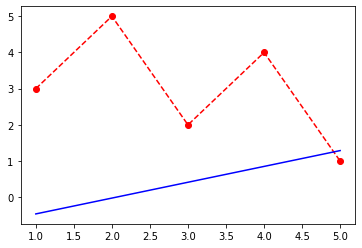

In [74]:
W, b = get_weights(model)
print("학습 전 >>> W : {:.3f}\tb : {:.3f}\n".format(W, b))

plt.plot(x_data, y_data, 'ro--')
plt.plot(x_data, x_data*W + b, 'b-')
plt.show()

In [75]:
def get_weights(model):
    weights = list(model.parameters())
    W = weights[0].item()
    b = weights[1].item()
    return W,b

W, b = get_weights(model)
print("학습 전 >>> W : {:.3f}\tb : {:.3f}\n".format(W, b))

for epoch in range(1, 1001):
    output = model(x_data)
    loss = loss_fn(output, y_data)
    
    opt.zero_grad() 
    loss.backward()
    opt.step()
    
    if epoch % 25 ==0:
        print("epoch {} >>> loss : {:.4f}".format(epoch,loss.item()))

W, b = get_weights(model)
print("\n학습 후 >>> W : {:.3f}\tb : {:.3f}".format(W, b))

학습 전 >>> W : 0.437	b : -0.897

epoch 25 >>> loss : 5.7695
epoch 50 >>> loss : 5.1044
epoch 75 >>> loss : 4.5430
epoch 100 >>> loss : 4.0690
epoch 125 >>> loss : 3.6688
epoch 150 >>> loss : 3.3309
epoch 175 >>> loss : 3.0457
epoch 200 >>> loss : 2.8049
epoch 225 >>> loss : 2.6017
epoch 250 >>> loss : 2.4301
epoch 275 >>> loss : 2.2852
epoch 300 >>> loss : 2.1629
epoch 325 >>> loss : 2.0596
epoch 350 >>> loss : 1.9724
epoch 375 >>> loss : 1.8988
epoch 400 >>> loss : 1.8367
epoch 425 >>> loss : 1.7843
epoch 450 >>> loss : 1.7400
epoch 475 >>> loss : 1.7026
epoch 500 >>> loss : 1.6710
epoch 525 >>> loss : 1.6444
epoch 550 >>> loss : 1.6219
epoch 575 >>> loss : 1.6029
epoch 600 >>> loss : 1.5869
epoch 625 >>> loss : 1.5733
epoch 650 >>> loss : 1.5619
epoch 675 >>> loss : 1.5523
epoch 700 >>> loss : 1.5441
epoch 725 >>> loss : 1.5373
epoch 750 >>> loss : 1.5315
epoch 775 >>> loss : 1.5266
epoch 800 >>> loss : 1.5224
epoch 825 >>> loss : 1.5189
epoch 850 >>> loss : 1.5160
epoch 875 >>> loss :


학습 후 >>> W : -0.451	b : 4.322


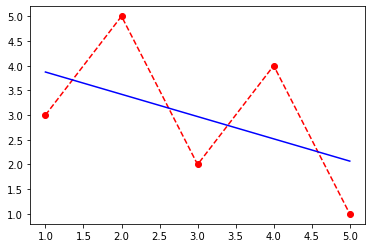

In [76]:
print("\n학습 후 >>> W : {:.3f}\tb : {:.3f}".format(W, b))

plt.plot(x_data, y_data, 'ro--')
plt.plot(x_data, x_data*W + b, 'b-')
plt.show()

# 다변수 회귀

+ Input_Feature의 개수가 2개 이상
+ 따라서 가설직선 함수의 모양은 **```H(X1,X2,X3... Xn) = W1*X1 + W2*X2 + ... + Wn * Xn + b```**
+ 학습시켜야할 가중치들은 **W1 ~ Wn와 b**이다.
![image](https://user-images.githubusercontent.com/28241676/136647218-7af0552c-9bf8-497b-92e6-1c5905251ad2.png)

In [42]:
# Data & Label
x1 = torch.tensor([[73.],[93.],[89.],[96.],[73.]])
x2 = torch.tensor([[80.],[88.],[91.],[98.],[66.]])
x3 = torch.tensor([[75.],[93.],[90.],[100.],[70.]])
Y = torch.tensor([[152.],[185.],[180.],[196.],[142.]])

In [50]:
# 가설 설정
def H(x1, x2, x3):
    return x1*W1.detach().numpy() + x2*W2.detach().numpy() + x3*W3.detach().numpy() + b.detach().numpy()

W1 = torch.tensor([-1.5], requires_grad=True) 
W2 = torch.tensor([1.5], requires_grad=True) 
W3 = torch.tensor([-3.], requires_grad=True) 
b = torch.tensor([3.], requires_grad=True) 

즉, 초기 `H(x) = -1.5*x1 + 1.5*x2 -3*x3 + 3`

In [51]:
print("실제값 Y :", Y[0].item())
print("예측값 Y :", H(x1[0], x2[0], x3[0]).item())

실제값 Y : 152.0
예측값 Y : -211.5


아직 학습 전이라 완전히 다른 값이 나오게 된다.

In [52]:
# 학습 설계
opt = optim.SGD([W1, W2, W3, b], lr=0.0000005)

print("\n학습 전 >>> W1 : {:.3f}\tW2 : {:.3f}\n\t  W3 : {:.3f}\tb : {:.3f}\n".format(W1.item(), W2.item(), W3.item(), b.item()))

for epoch in range(1, 251):
    output = x1*W1 + x2*W2 + x3*W3 + b
    loss = torch.mean(output - Y) ** 2
    
    opt.zero_grad() 
    loss.backward()
    opt.step()
    
    if epoch % 25 ==0:
        print("epoch {} >>> loss : {:.4f}".format(epoch,loss.item()))

print("\n학습 후 >>> W1 : {:.3f}\tW2 : {:.3f}\n\t  W3 : {:.3f}\tb : {:.3f}".format(W1.item(), W2.item(), W3.item(), b.item()))


학습 전 >>> W1 : -1.500	W2 : 1.500
	  W3 : -3.000	b : 3.000

epoch 25 >>> loss : 63116.0977
epoch 50 >>> loss : 21099.0605
epoch 75 >>> loss : 7053.1982
epoch 100 >>> loss : 2357.8110
epoch 125 >>> loss : 788.1897
epoch 150 >>> loss : 263.4839
epoch 175 >>> loss : 88.0808
epoch 200 >>> loss : 29.4445
epoch 225 >>> loss : 9.8428
epoch 250 >>> loss : 3.2905

학습 후 >>> W1 : 0.156	W2 : 3.152
	  W3 : -1.328	b : 3.020


In [56]:
print("실제값 Y :", Y)
print("예측값 Y :", H(x1, x2, x3))

실제값 Y : tensor([[152.],
        [185.],
        [180.],
        [196.],
        [142.]])
예측값 Y : tensor([[166.9637],
        [171.3931],
        [184.2102],
        [194.0849],
        [129.4749]])


### Matrix(행렬)
+ 행렬의 곱셈 공식을 이용(**내적 = Dot Product**)
+ $$ H(x) = w x + b $$

$$ H(x_1, x_2, x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b $$
여기서 H(x_1,x_2,x_3)는...
+ $$ H(x_1, x_2, x_3) = \underline{w_1 x_1 + w_2 x_2 + w_3 x_3} + b $$

$$ w_1 x_1 + w_2 x_2 + w_3 x_3 $$ 

$$ \begin{pmatrix} w_{ 1 } & w_{ 2 } & w_{ 3 } \end{pmatrix}\cdot \begin{pmatrix} x_{ 1 } \\ x_{ 2 } \\ x_{ 3 } \end{pmatrix} $$

$$ WX $$ (W, X 는 matrix)

$$ H(x_1, x_2, x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$$

$$ = b + w_1 x_1 + w_2 x_2 + w_3 x_3 $$

$$ = \begin{pmatrix} 1 & x_{ 1 } & x_{ 2 } & x_{ 3 } \end{pmatrix}\cdot \begin{pmatrix} b \\ w_{ 1 } \\ w_{ 2 } \\ w_{ 3 } \end{pmatrix} $$

$$ = XW $$

+ 즉, 복잡한 모양의 데이터(데이터의 개수 모양에 상관 X)에도 간략하게 표현이 가능
+ 따라서, H(x1, x2, x3) => **H(X) = Xn * Wn + b**

##  X도 여러개, Y도 여러개일 경우
+ ![image](https://user-images.githubusercontent.com/28241676/136653511-a95aebe3-6b43-4a6d-9094-2529c883eca5.png)

In [66]:
### 연습 ###
x_data = torch.tensor([
                   [13, 24, 52],
                   [42, 53, 42],
                   [33, 29, 57],
                   [25, 26, 81],
                   [17, 28, 39]
            ]).float()

y_data = torch.tensor([
              [21,45],
              [67,42],
              [82,91],
              [57,52],
              [17,49]
            ]).float()

In [69]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        self.fc = nn.Linear(3,2)
    def forward(self, x):
        x = self.fc(x)
        return x
    
model = MyModel()
loss_fn = nn.MSELoss()
opt = optim.SGD(model.parameters(), lr=0.0001)

print(model)
print(list(model.parameters()))

MyModel(
  (fc): Linear(in_features=3, out_features=2, bias=True)
)
[Parameter containing:
tensor([[-0.2880, -0.3012, -0.3388],
        [-0.0368,  0.3511, -0.2049]], requires_grad=True), Parameter containing:
tensor([ 0.0319, -0.2258], requires_grad=True)]


In [70]:
print("학습 전 파라미터 : \n\t\t\t {}\n".format(list(model.parameters())))

for epoch in range(1, 1001):
    output = model(x_data)
    loss = loss_fn(output, y_data)
    
    opt.zero_grad() 
    loss.backward()
    opt.step()
    
    if epoch % 25 ==0:
        print("epoch {} >>> loss : {:.4f}".format(epoch,loss.item()))

print("학습 후 파라미터 : \n\t\t\t {}\n".format(list(model.parameters())))

학습 전 파라미터 : 
			 [Parameter containing:
tensor([[-0.2880, -0.3012, -0.3388],
        [-0.0368,  0.3511, -0.2049]], requires_grad=True), Parameter containing:
tensor([ 0.0319, -0.2258], requires_grad=True)]

epoch 25 >>> loss : 353.1830
epoch 50 >>> loss : 320.6848
epoch 75 >>> loss : 300.9650
epoch 100 >>> loss : 285.6898
epoch 125 >>> loss : 272.5851
epoch 150 >>> loss : 260.9588
epoch 175 >>> loss : 250.5402
epoch 200 >>> loss : 241.1762
epoch 225 >>> loss : 232.7528
epoch 250 >>> loss : 225.1735
epoch 275 >>> loss : 218.3530
epoch 300 >>> loss : 212.2153
epoch 325 >>> loss : 206.6917
epoch 350 >>> loss : 201.7207
epoch 375 >>> loss : 197.2468
epoch 400 >>> loss : 193.2204
epoch 425 >>> loss : 189.5964
epoch 450 >>> loss : 186.3344
epoch 475 >>> loss : 183.3983
epoch 500 >>> loss : 180.7553
epoch 525 >>> loss : 178.3761
epoch 550 >>> loss : 176.2342
epoch 575 >>> loss : 174.3057
epoch 600 >>> loss : 172.5693
epoch 625 >>> loss : 171.0058
epoch 650 >>> loss : 169.5977
epoch 675 >>> lo

In [71]:
model.eval()
output = model(x_data)

print("실제 값 : {}".format(y_data))
print("예측 값 : {}".format(output))

실제 값 : tensor([[21., 45.],
        [67., 42.],
        [82., 91.],
        [57., 52.],
        [17., 49.]])
예측 값 : tensor([[18.4441, 38.7139],
        [67.6032, 56.1495],
        [75.9423, 66.8319],
        [59.8264, 73.1771],
        [22.7765, 33.5031]], grad_fn=<AddmmBackward0>)
